In [1]:
import numpy as np
from numpy import random

In [2]:
def normal(value, mean, std) -> float:
    numerator   = np.exp((-1 * (value - mean) ** 2) / (2 * std ** 2))
    denominator = std * np.sqrt(2 * np.pi)
    return numerator / denominator

def bernoulli(p) -> bool:
    uniform_random = random.uniform(0, 1)
    return uniform_random < p

def gaussian_mcmc(length, mean, std):
    states          = []
    burn_in_length  = int(length / 5)
    current_state   = random.uniform(-5 * std + mean, 5 * std + mean)

    for _ in range(length):
        states += [current_state]

        movement = random.uniform(-5 * std + mean, 5 * std + mean)

        current_probability = normal(current_state, mean, std)
        move_probability    = normal(movement, mean, std)

        acceptance_probability = min(1, move_probability / current_probability)

        if bernoulli(acceptance_probability):
            current_state = movement
    
    return states[burn_in_length:]

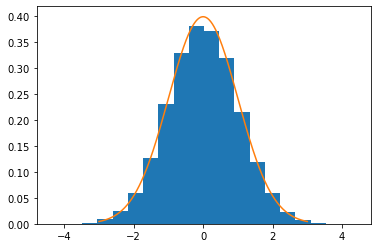

In [6]:
import matplotlib.pyplot as plt

lines = np.linspace(-3, 3, 1000)
normal_curve = [normal(x, 0, 1) for x in lines]
dist = gaussian_mcmc(100_000, 0, 1)

plt.hist(dist, density=True, bins=20)
plt.plot(lines, normal_curve)

In [17]:
import pandas as pd
import requests, re
from tqdm import tqdm

url = r"https://www.gutenberg.org/files/2600/2600-0.txt"

# Download the text
text = requests.get(url).text

#Clean the text by removing all non alphanumeric characters
text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
#Convert all spaces to a single space
text = re.sub(r'\s+', ' ', text)

#Convert the text to lowercase
text = text.lower()

In [21]:
#Generate a transition matrix for each unique character
transition_matrix = pd.DataFrame(0, index=list(set(text)), columns=list(set(text)))
transition_matrix = transition_matrix.sort_index().sort_index(axis=1)

#Iterate through the text and update the transition matrix
for i in tqdm(range(len(text) - 1)):
    transition_matrix.loc[text[i], text[i + 1]] += 1

transition_matrix

100%|██████████| 3088801/3088801 [04:38<00:00, 11071.69it/s]


,,0,1,2,3,4,5,6,7,8,...,q,r,s,t,u,v,w,x,y,z
,0,2,271,66,29,12,10,18,7,11,...,1425,15135,40749,87499,5643,3986,40625,449,6739,146
0,52,34,5,2,0,0,27,12,15,5,...,0,0,0,0,0,0,0,0,0,0
1,50,15,16,62,20,1,9,3,8,166,...,0,0,1,0,0,0,0,0,0,0
2,107,12,3,4,2,3,3,2,2,0,...,0,0,0,3,0,0,0,0,0,0
3,42,7,1,0,0,0,0,0,0,0,...,0,5,1,3,0,0,0,0,0,0
4,14,2,2,0,0,0,0,1,0,0,...,0,0,0,2,0,0,0,1,0,0
5,37,8,0,0,0,2,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6,26,5,1,2,0,1,0,12,1,0,...,0,0,1,3,0,0,0,0,0,0
7,26,3,1,0,0,0,0,0,0,4,...,0,0,0,3,0,0,0,0,0,0
8,15,79,85,4,0,1,0,1,1,1,...,0,0,0,2,0,0,0,0,0,0
